In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import pickle
import joblib

In [8]:
df = pd.read_csv(r'C:\Users\SreeKeerthiReddyThat\Desktop\statistis\Student_Performance.csv')

In [9]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [12]:
features =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']
target = ['Performance Index']

In [13]:
X = df[features]
y = df[target]

In [14]:
# 2.1 Handle Null Values
null_values = df.isnull().sum()
print(null_values)


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [15]:
# 2.2 Handle Categorical Variables
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [16]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [17]:
# 2.3 Handle Outliers (using IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    df = remove_outliers(df, col)


In [18]:
# Define features (X) and target (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

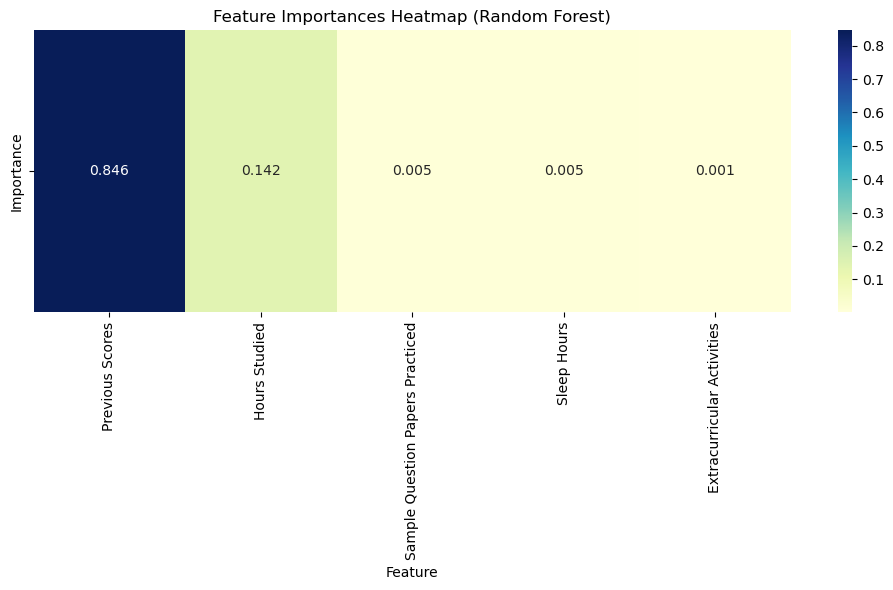

In [19]:

# 2.4 Feature Selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assuming X and y are already defined and preprocessed

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Feature Importances Heatmap (Random Forest)')
plt.tight_layout()
plt.show()



In [20]:
# 2.5 Feature Scaling
scaler = StandardScaler()
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982,23.0
9996,0.775188,-0.314013,1,0.866505,0.145333,58.0
9997,0.388965,0.781575,1,0.866505,0.145333,74.0
9998,1.547633,1.588851,1,0.276805,-1.598526,95.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.8147207361111108
Mean Squared Error: 5.158838006796808
Root Mean Squared Error: 2.271307554426923
R^2 Score: 0.9860792088401176


In [25]:
# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [26]:
# Save the model using joblib
joblib.dump(model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [27]:
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation function
def evaluate_regression(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 Evaluation Metrics for {dataset_name}:")
    print(f"1. Mean Absolute Error (MAE) : {mae:.4f}")
    print(f"2. Mean Squared Error (MSE)  : {mse:.4f}")
    print(f"3. Root Mean Squared Error   : {rmse:.4f}")
    print(f"4. R² Score                  : {r2:.4f}")
    

# Evaluate on Training and Testing sets
evaluate_regression(y_train, y_train_pred, "Training Set")
evaluate_regression(y_test, y_test_pred, "Testing Set")



📊 Evaluation Metrics for Training Set:
1. Mean Absolute Error (MAE) : 0.7463
2. Mean Squared Error (MSE)  : 0.9378
3. Root Mean Squared Error   : 0.9684
4. R² Score                  : 0.9975

📊 Evaluation Metrics for Testing Set:
1. Mean Absolute Error (MAE) : 1.8147
2. Mean Squared Error (MSE)  : 5.1588
3. Root Mean Squared Error   : 2.2713
4. R² Score                  : 0.9861


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_15552\753259643.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='crest')


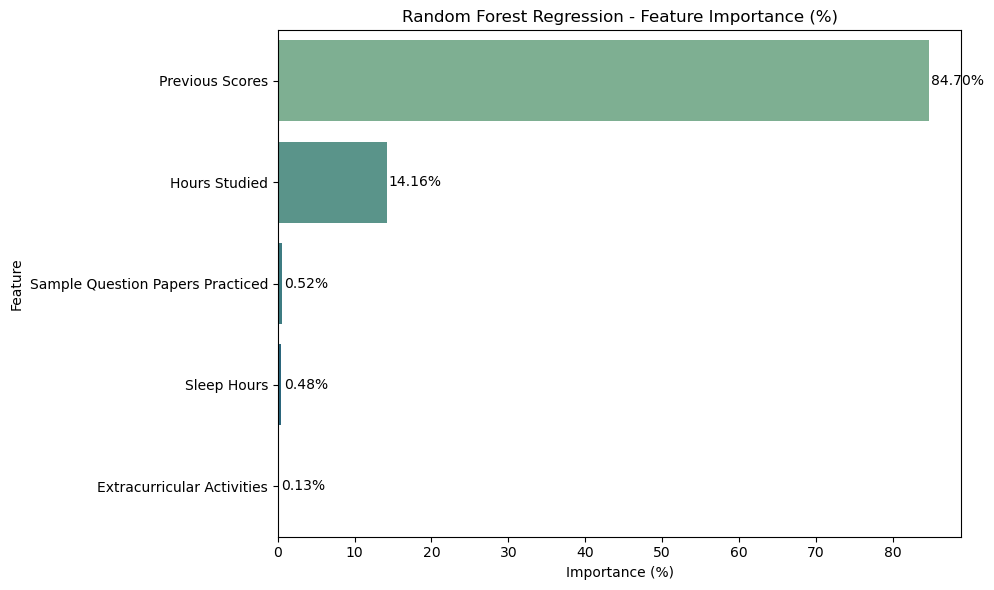

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Calculate percentage importance
feature_importance_df['Importance (%)'] = 100 * feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df, palette='crest')

# Add percentages beside bars
for i, (value, name) in enumerate(zip(feature_importance_df['Importance (%)'], feature_importance_df['Feature'])):
    plt.text(value + 0.3, i, f"{value:.2f}%", va='center')

plt.title('Random Forest Regression - Feature Importance (%)')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



